# 项目：可视化帕默群岛企鹅数据

## 分析目标

此数据分析报告的目的是对帕默群岛上企鹅样本的相关变量进行可视化，从而探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。

## 简介

原始数据`Penguins.csv`包括334个收集自南极洲帕尔默群岛的3个岛屿上的企鹅样本，以及企鹅相关属性数据，包括种类名、所在岛、嘴峰长度、嘴峰深度、鳍长度、体重、性别。

`Penguins.csv`每列的含义如下：
- species：企鹅的种类
- island：企鹅所在岛
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）
- flipper_length_mm：企鹅鳍的长度（单位为毫米）
- body_mass_g：企鹅体重（单位为克）
- sex：企鹅性别

# 读取数据


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data=pd.read_csv("F:/python6数据可视化篇/penguins.csv")
original_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# 评估和清洗数据

我们首先从数据的结构和内容进行分析：即整洁度和干净度
整洁度包含：每行是一个观察值，每列是一个变量，每个单元格是一个数值
干净度包含：是否存在丢失数据，重复数据和无效数据
我们先对`original_data`进行复制，复制为`cleaned_data`的`DataFrame`

In [3]:
cleaned_data=original_data.copy()
cleaned_data.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
217,Chinstrap,Dream,49.6,18.2,193.0,3775.0,MALE
185,Chinstrap,Dream,51.0,18.8,203.0,4100.0,MALE
138,Adelie,Dream,37.0,16.5,185.0,3400.0,FEMALE
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.
29,Adelie,Biscoe,40.5,18.9,180.0,3950.0,MALE
218,Chinstrap,Dream,50.8,19.0,210.0,4100.0,MALE
252,Gentoo,Biscoe,45.1,14.5,207.0,5050.0,FEMALE
271,Gentoo,Biscoe,48.5,14.1,220.0,5300.0,MALE
293,Gentoo,Biscoe,46.5,14.8,217.0,5200.0,FEMALE
41,Adelie,Dream,40.8,18.4,195.0,3900.0,MALE


我们发现其结构符合我们所需的要求，接下来我们检查其内容

In [4]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


总共有344组数据，其中`culmen_length_mm `,`culmen_depth_mm`,`flipper_length_mm `,`body_mass_g`,`sex`的数据存在缺失，其中`culmen_length_mm `,`culmen_depth_mm`,`flipper_length_mm `,`body_mass_g`都只缺失两次
数据类型方面，我们已知`species`（企鹅种类）`sex`（企鹅性别）、`island`（企鹅所在岛）都是分类数据，因此可以把数据类型都转换为Category。

我们先进行数据类型转换

In [5]:
cleaned_data['species']=cleaned_data['species'].astype("category")
cleaned_data['sex'] = cleaned_data['sex'].astype("category")
cleaned_data['island'] = cleaned_data['island'].astype("category")
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


我们先提取`culmen_length_mm`缺失所在的观察值

In [6]:
cleaned_data[cleaned_data['culmen_length_mm'].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


我们发现其同时缺失`culmen_depth_mm`,`flipper_length_mm `,`body_mass_g`有关的重要数据并且都正好都是缺失两次，需要进行删除,再进行检查

In [7]:
cleaned_data.dropna(subset="culmen_length_mm",inplace=True)
cleaned_data['culmen_length_mm'].isnull().sum()

np.int64(0)

我们最后提取`sex`缺失的数据

In [8]:
cleaned_data.query("sex.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


缺失性别变量的观察值具备其它数据，仍然可以为分析提供价值。由于Pandas以及Matplotlib、Seaborn会自动忽略缺失值，可以保留这些行。

## 处理重复数据

理论上我们允许出现重复数据，所以不需要进行检查

## 处理不一致数据

In [9]:
cleaned_data['species'].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [10]:
cleaned_data['island'].value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

In [11]:
cleaned_data['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

我们发现只有`sex`里面存在一个`.`,我们把它变为`NaN`

In [14]:
cleaned_data['sex']=cleaned_data['sex'].rename({'.':np.nan})
cleaned_data['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

此时不存在不一致数据了

## 处理无效或错误数据

In [13]:
cleaned_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


从以上统计信息来看，`cleaned_house_price`里不存在脱离现实意义的数值。

# 数据探索

我们将通过数据可视化，进行探索和分析，从图表中获得企鹅样本数据的相关洞察。

In [16]:
#设置图表色盘为"pastel"
sns.set_palette("pastel")

In [18]:
cleaned_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## 企鹅种类比例

([<matplotlib.patches.Wedge at 0x1d8264b5f40>,
 [Text(0.20095570279004357, 1.0814882364206093, 'Adelie'),
  Text(-1.063814722768827, -0.2798182188855543, 'Chinstrap'),
  Text(0.4694539283527212, -0.9947929478812153, 'Gentoo')],
 [Text(0.10961220152184194, 0.5899026744112414, '44%'),
  Text(-0.5802625760557237, -0.1526281193921205, '20%'),
  Text(0.25606577910148426, -0.5426143352079356, '36%')])

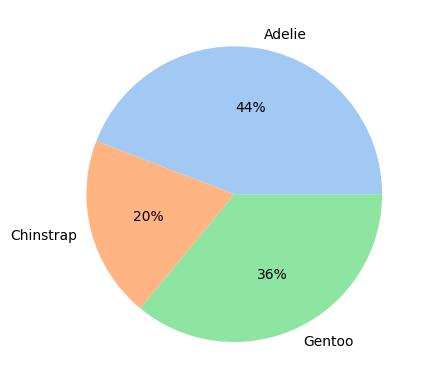

In [23]:
species_count=cleaned_data.groupby("species",observed=True)["island"].count()
#或者 cleaned_data['species'].value_counts()
plt.pie(species_count,autopct='%0.f%%',labels=species_count.index)

样本中`Adelie`这个种类的企鹅占比最大，`Gentoo`种类的占比次之，`Chinstrap`的占比最小，为1/5左右。

## 企鹅所属岛屿比例

([<matplotlib.patches.Wedge at 0x1d826377770>,
 [Text(0.040408993903112124, 1.0992575281578645, 'Biscoe'),
  Text(-0.5324063168406664, -0.9625713032228604, 'Dream'),
  Text(0.9814795839173, -0.49668684938653646, 'Torgersen')],
 [Text(0.022041269401697518, 0.5995950153588351, '49%'),
  Text(-0.2904034455494544, -0.5250388926670148, '36%'),
  Text(0.5353525003185272, -0.2709200996653835, '15%')])

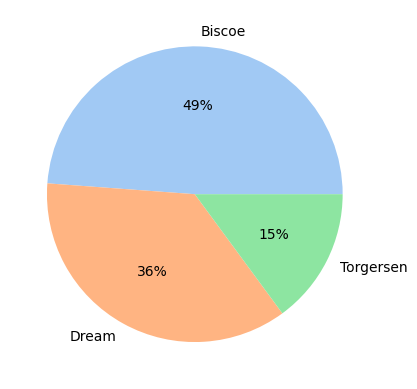

In [24]:
island_count=cleaned_data["island"].value_counts()
plt.pie(island_count,autopct="%.0f%%",labels=island_count.index)

## 企鹅性别比例

([<matplotlib.patches.Wedge at 0x1d8263758b0>,
 [Text(-0.01556599676421093, 1.0998898580061263, 'MALE'),
  Text(0.015565699568373776, -1.0998898622120976, 'FEMALE')],
 [Text(-0.008490543689569597, 0.5999399225487961, '50%'),
  Text(0.008490381582749331, -0.5999399248429623, '50%')])

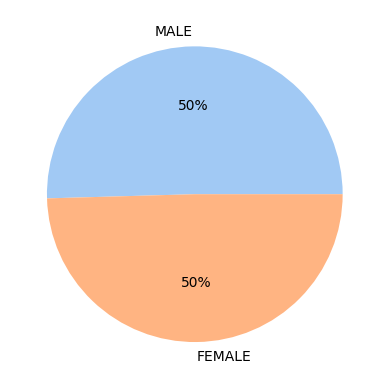

In [26]:
sex_count=cleaned_data['sex'].value_counts()
plt.pie(sex_count,autopct="%0.f%%",labels=sex_count.index)

## 不同岛上的企鹅种类数量

<Axes: xlabel='island', ylabel='count'>

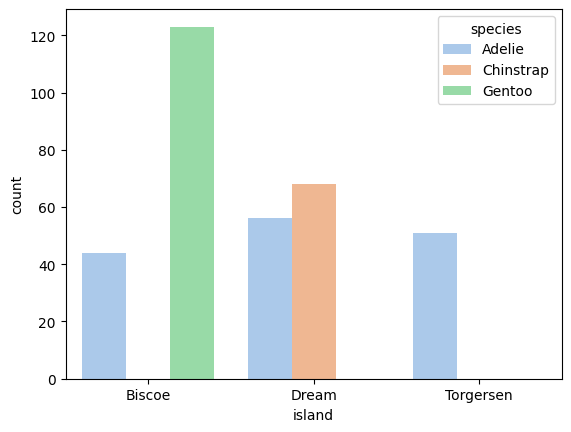

In [27]:
sns.countplot(cleaned_data,x="island",hue="species")

## 不同岛上企鹅性别分布

<Axes: xlabel='island', ylabel='count'>

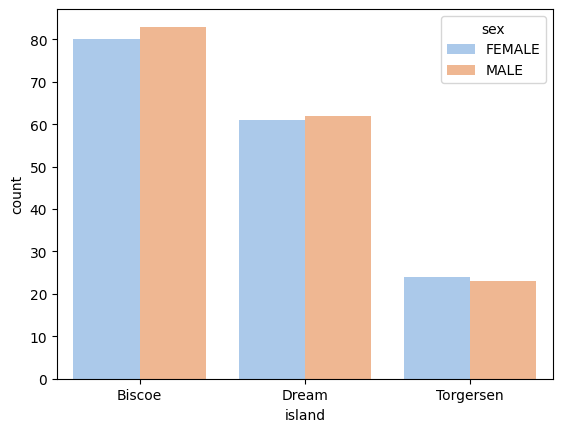

In [28]:
sns.countplot(cleaned_data,x="island",hue="sex")

## 查看数值之间的相关关系

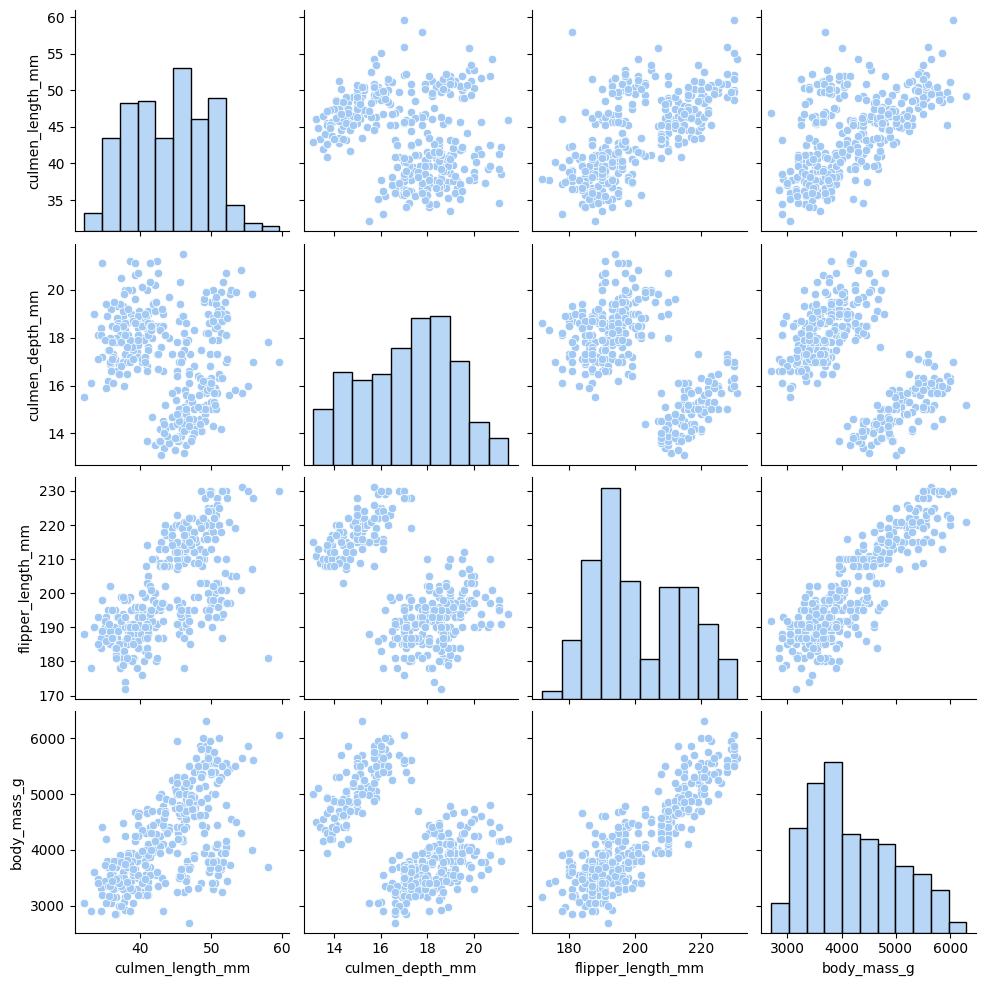

In [29]:
sns.pairplot(cleaned_data)

从直方图来看，企鹅样本的嘴峰长度、嘴峰深度、鳍长度、体重的分布不是正态分布。一方面说明，这里面可能包含了多组存在差异的样本数据，另一方面也说明样本数不够大。

另外可以在散点图中看出明显的多个集群，可能与某些因素有关，比如企鹅种类、性别，因此可以对对比进行进一步的分类。

## 根据种类查看数值之间的相关关系

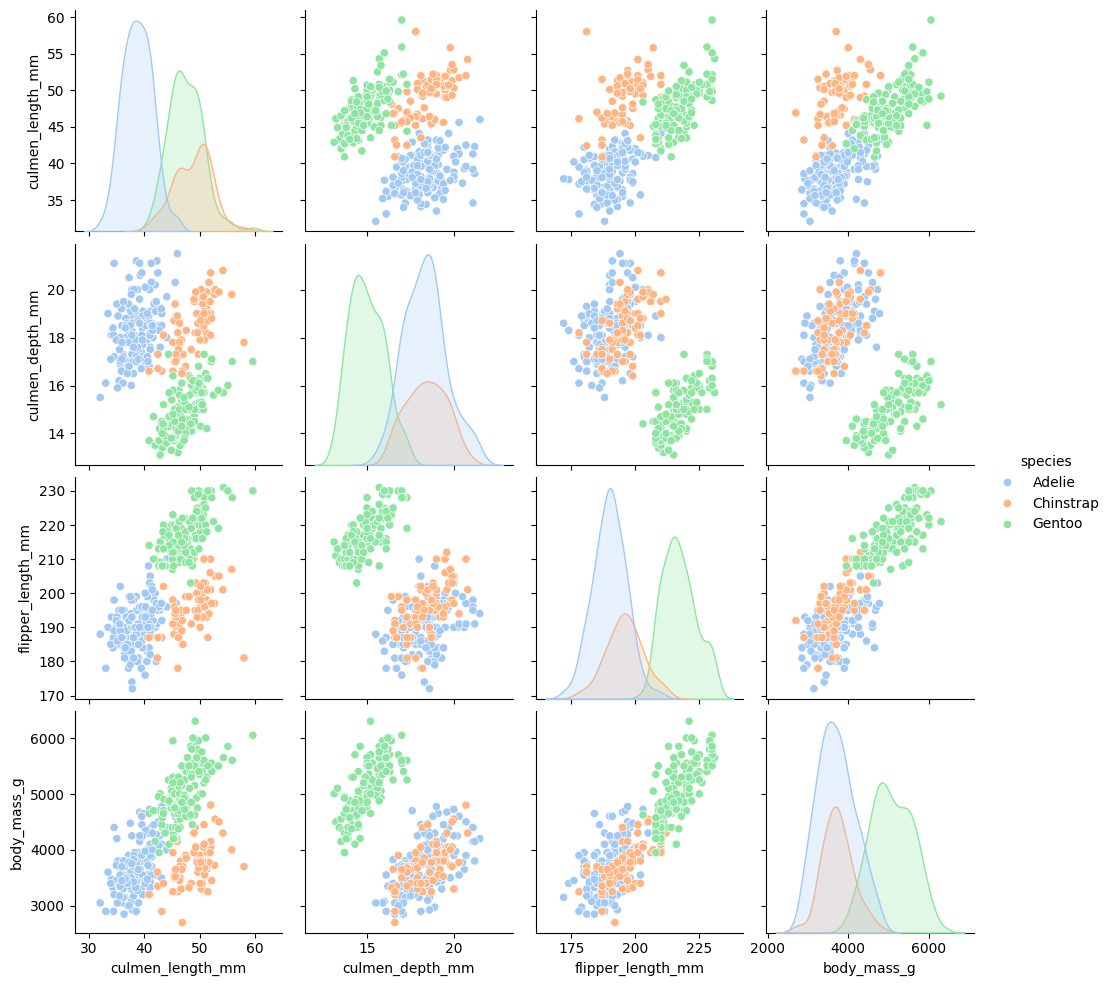

In [31]:
sns.pairplot(cleaned_data,hue="species")

同一种类的企鹅样本数据，在散点图上基本都聚在一起，说明同一种类的企鹅在嘴峰长度、嘴峰深度、鳍长度、体重之间关系上，存在相似性。这些发现有利于我们根据体重、鳍长等数值推测企鹅种类，也可以根据企鹅种类推测体重、鳍长等数值。

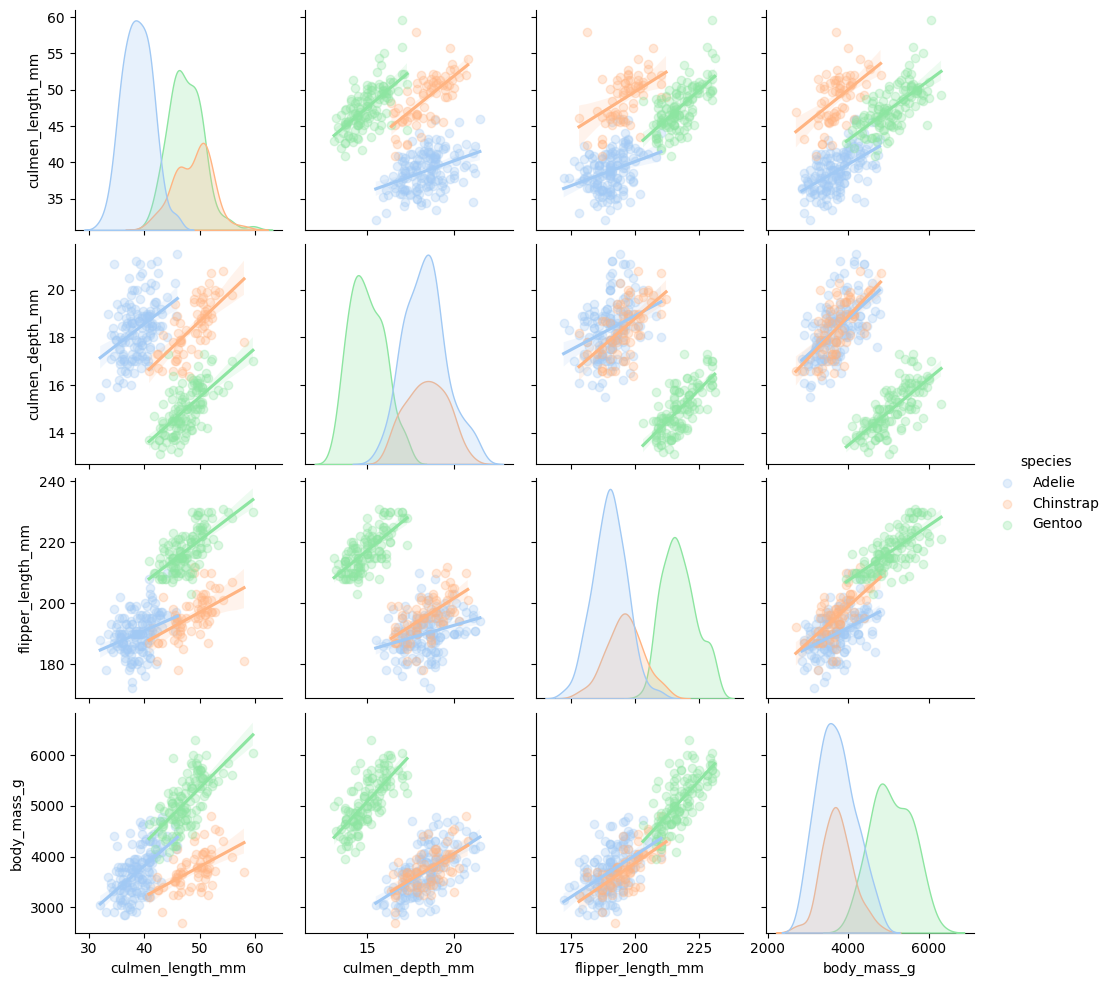

In [35]:
sns.pairplot(cleaned_data,hue="species",kind='reg',plot_kws={"scatter_kws":{"alpha":0.3}})

散点图结合线性回归线来看，同类企鹅的属性数据之间均呈线性正比，即嘴峰越长，嘴峰越深，鳍越长，体重越重，嘴峰越短，嘴峰越浅，鳍越短，体重越轻。

从密度图的分布来看，可以得到以下关于样本的发现：
- Chinstrap和Gentoo的嘴峰长度范围较为接近，而Adelie的嘴峰长度更短。
- Adelie和Chinstrap的嘴峰深度范围较为接近，而Gentoo的嘴峰深度更短。
- Adelie的鳍长度最短，Chinstrap中等，而Gentoo的鳍长度嘴长。
- Adelie和Chinstrap的体重范围较为接近，而Gentoo的体重更大。

但不同种类的属性数值否存在统计显著性差异，仍然需要进行假设检验后才能得到结论。

## 根据性别查看数值之间的相关关系

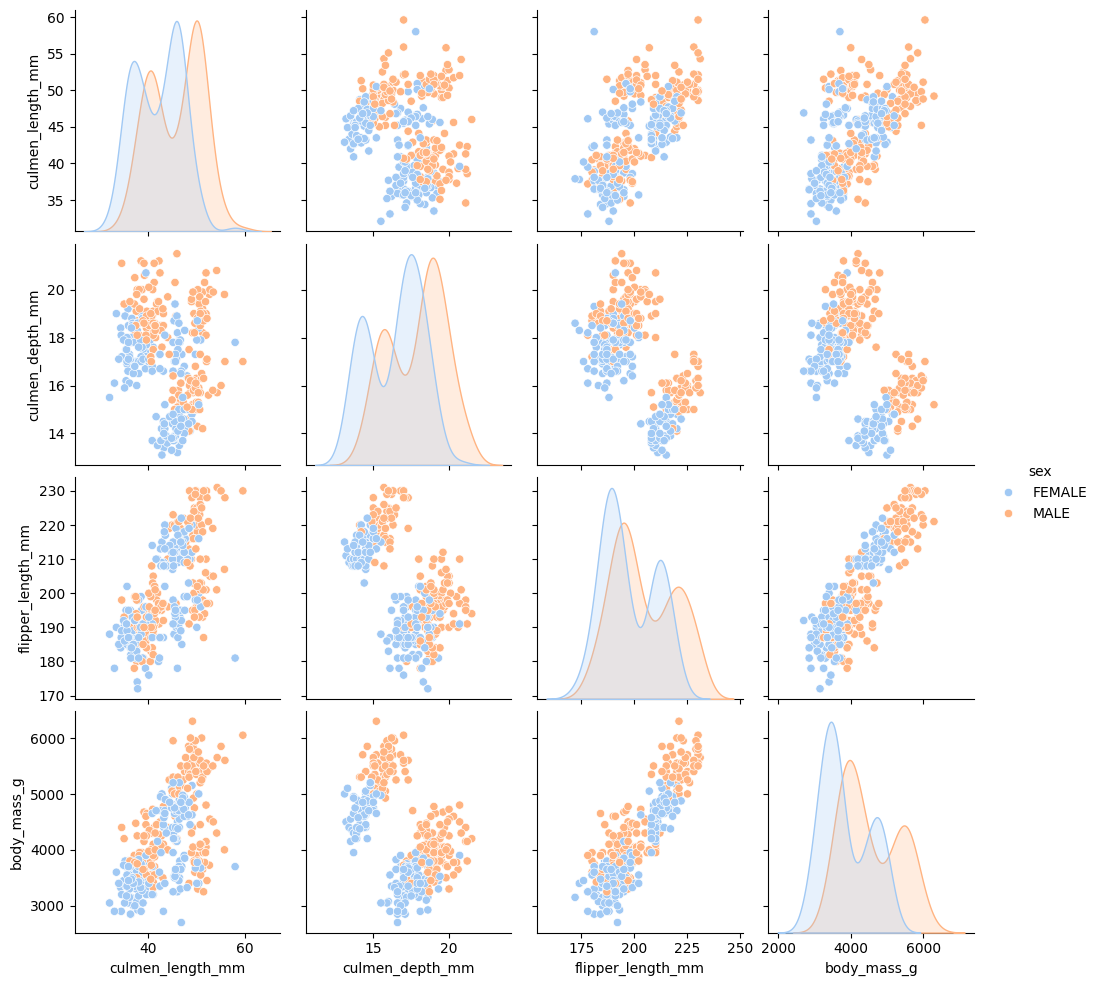

In [38]:
sns.pairplot(cleaned_data,hue='sex')

根据性别划分后可以看出，样本中雄性企鹅在各项属性数值方面大于雌性企鹅。